In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# estimate PDF of plug-in time
from scipy.stats import norm
from scipy.stats.sampling import NumericalInversePolynomial

class StandardNormal:
    """Standard normal distribution"""
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def pdf(self, x):
        return norm.pdf(x, loc=self.mean, scale=self.std)

    def cdf(self, x):
        return norm.cdf(x, loc=self.mean, scale=self.std)
    
    def inverse_cdf(self, x):
        return norm.ppf(x, loc=self.mean, scale=self.std)
 

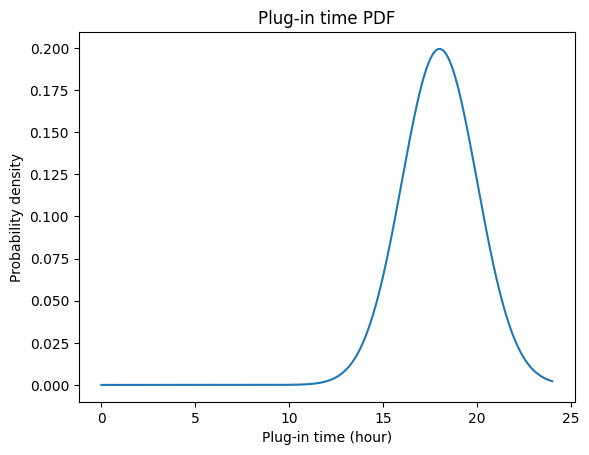

In [4]:
# mean of plug-in time - 24 hour clock
mean = 18
std = 2

# plug-in time is a standard normal distribution
plug_in_time = StandardNormal(mean, std)

# estimate PDF of plug-in time
x = np.linspace(0, 24, 1000)
y = plug_in_time.pdf(x)

# plot PDF of plug-in time
plt.plot(x, y)
plt.xlabel('Plug-in time (hour)')
plt.ylabel('Probability density')
plt.title('Plug-in time PDF')
plt.show()

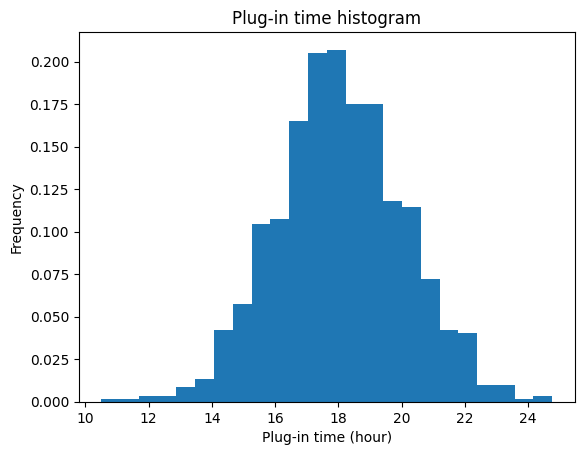

In [12]:
sample_size = 1000
sample = plug_in_time.inverse_cdf(np.random.rand(sample_size, 1))
x = np.linspace(0, 24, 1000)
# plot histogram of plug-in time
plt.hist(sample, bins=24, density=True)
plt.xlabel('Plug-in time (hour)')
plt.ylabel('Frequency')
plt.title('Plug-in time histogram')
plt.show()

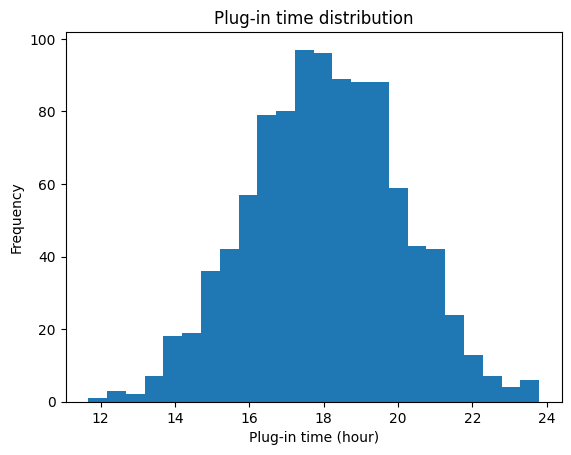

In [8]:
# inverse cdf
sample_size = 1000
inverse_cdf = NumericalInversePolynomial(plug_in_time, domain=(0, 24))
inverse_cdf_samples = inverse_cdf.rvs(size=sample_size)

# plot histogram of plug-in time
plt.hist(inverse_cdf_samples, bins=24)
plt.xlabel('Plug-in time (hour)')
plt.ylabel('Frequency')
plt.title('Plug-in time distribution')
plt.show()


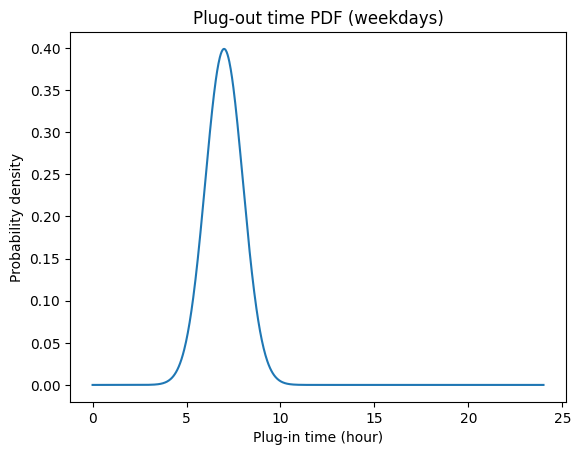

In [11]:
# mean of plug-out time, weekdays - 24 hour clock
mean = 7
std = 1

# plug-in time is a standard normal distribution
plug_out_time_wd = StandardNormal(mean, std)

# estimate PDF of plug-in time
x = np.linspace(0, 24, 1000)
y = plug_out_time_wd.pdf(x)

# plot PDF of plug-in time
plt.plot(x, y)
plt.xlabel('Plug-in time (hour)')
plt.ylabel('Probability density')
plt.title('Plug-out time PDF (weekdays)')
plt.show()